In [28]:
#Import python libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns,  os
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score
import warnings
sns.set()


In [29]:
#Import data into dataframe
data = pd.read_csv('CountryData.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,category,HDI
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Developing,0.511
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,0.795
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,0.748
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Developing,0.581
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,0.778


In [30]:
#Get information about dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     162 non-null    object 
 1   child_mort  162 non-null    float64
 2   exports     162 non-null    float64
 3   health      162 non-null    float64
 4   imports     162 non-null    float64
 5   income      162 non-null    int64  
 6   inflation   162 non-null    float64
 7   life_expec  162 non-null    float64
 8   total_fer   162 non-null    float64
 9   gdpp        162 non-null    int64  
 10  category    162 non-null    object 
 11  HDI         162 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 15.3+ KB


In [31]:
#Check for null values in each column"
for c in data.columns:
    print(c, data[c].isnull().sum())


country 0
child_mort 0
exports 0
health 0
imports 0
income 0
inflation 0
life_expec 0
total_fer 0
gdpp 0
category 0
HDI 0


HDI           0.000000
imports       0.124158
inflation     0.280253
health        0.309253
exports       0.395574
gdpp          0.690663
income        0.706149
life_expec    0.864259
total_fer     0.870225
child_mort    0.878051
Name: HDI, dtype: float64


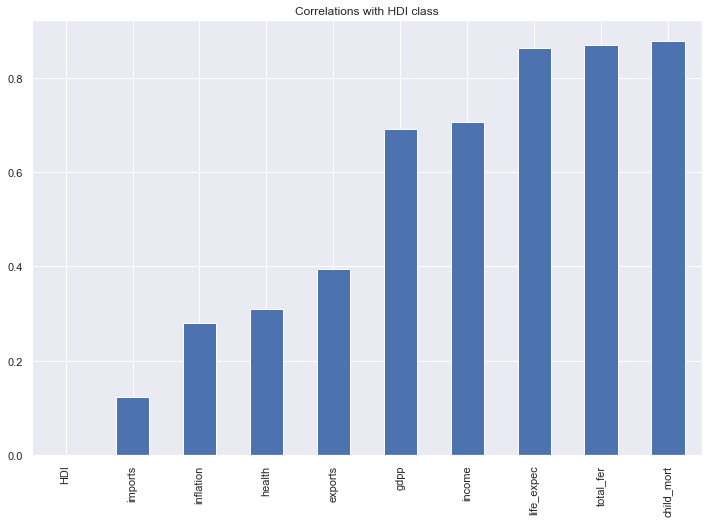

In [32]:
#Plot correlations with HDI class
corr_matrix = data.corr()

for i in range(corr_matrix.shape[1]):
    corr_matrix.iloc[i,i] = 0
 
correlations=corr_matrix['HDI']
correlations=correlations.abs().sort_values()
print(correlations)
ax = correlations.plot(kind='bar',title='Correlations with HDI class',figsize=(12,8))

<AxesSubplot:xlabel='income', ylabel='Count'>

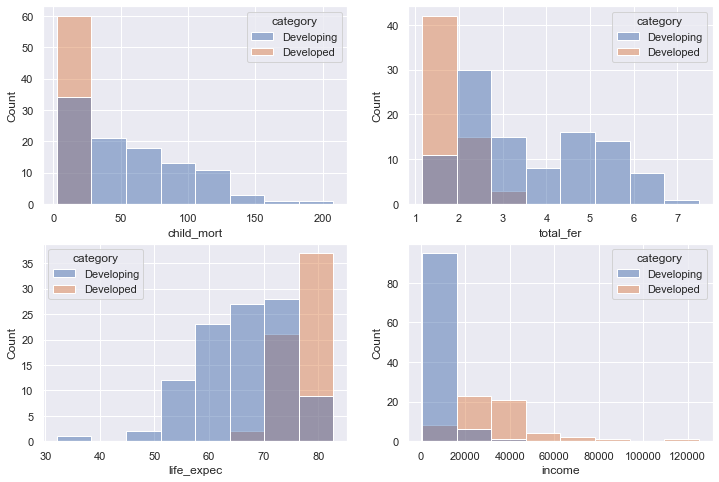

In [33]:
#Plot histograms of features most correlated with category variable

sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)
sns.histplot(data, x='child_mort', hue='category', bins=8, ax=axes[0,0])
sns.histplot(data, x='total_fer', hue='category', bins=8, ax=axes[0,1])
sns.histplot(data, x='life_expec', hue='category', bins=8, ax=axes[1,0])
sns.histplot(data, x='income', hue='category', bins=8, ax=axes[1,1])

In [34]:
#Display correlation matrix

corr_matrix = data.corr()
for i in range(corr_matrix.shape[1]):
    corr_matrix.iloc[i,i] = 0
    
corr_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,HDI
child_mort,0.000000,-0.315310,-0.212135,-0.124176,-0.533033,0.286545,-0.886141,0.846608,-0.486074,-0.878051
exports,-0.315310,0.000000,-0.114653,0.749718,0.513908,-0.111258,0.311886,-0.317626,0.412808,0.395574
health,-0.212135,-0.114653,0.000000,0.094757,0.159585,-0.256491,0.220803,-0.209003,0.357740,0.309253
imports,-0.124176,0.749718,0.094757,0.000000,0.145432,-0.237599,0.052948,-0.155840,0.125439,0.124158
income,-0.533033,0.513908,0.159585,0.145432,0.000000,-0.172852,0.621138,-0.510048,0.905220,0.706149
inflation,0.286545,-0.111258,-0.256491,-0.237599,-0.172852,0.000000,-0.239523,0.315322,-0.233478,-0.280253
life_expec,-0.886141,0.311886,0.220803,0.052948,0.621138,-0.239523,0.000000,-0.759626,0.601540,0.864259
total_fer,0.846608,-0.317626,-0.209003,-0.155840,-0.510048,0.315322,-0.759626,0.000000,-0.458968,-0.870225
gdpp,-0.486074,0.412808,0.357740,0.125439,0.905220,-0.233478,0.601540,-0.458968,0.000000,0.690663
HDI,-0.878051,0.395574,0.309253,0.124158,0.706149,-0.280253,0.864259,-0.870225,0.690663,0.000000


In [35]:
#Highest correlations for each feature

corr_matrix.abs().idxmax()

child_mort    life_expec
exports          imports
health              gdpp
imports          exports
income              gdpp
inflation      total_fer
life_expec    child_mort
total_fer            HDI
gdpp              income
HDI           child_mort
dtype: object

In [36]:
#Create dataframe with independent variables and select skewed columns

data2=data.drop(columns=['country','HDI','category'])

skew_columns = (data2
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

inflation     5.162011
exports       2.465939
income        2.266567
gdpp          2.225169
imports       1.932827
child_mort    1.409311
total_fer     0.928635
dtype: float64

In [37]:
#Display minimum values for each column
print(data2.min(axis=0))

child_mort      2.6000
exports         0.1090
health          1.8100
imports         0.0659
income        609.0000
inflation      -4.2100
life_expec     32.1000
total_fer       1.1500
gdpp          231.0000
dtype: float64


In [38]:
# Perform log transform on skewed columns

for c in skew_columns.index.tolist():
    data2[c] = np.log1p(data2[c]+5)

In [39]:
#Scale data with Standard Scaler
from sklearn.preprocessing import StandardScaler

temp=data2.copy()
sc = StandardScaler()
data2 = sc.fit_transform(data2)
data2=pd.DataFrame(data2)
data2.columns=temp.columns


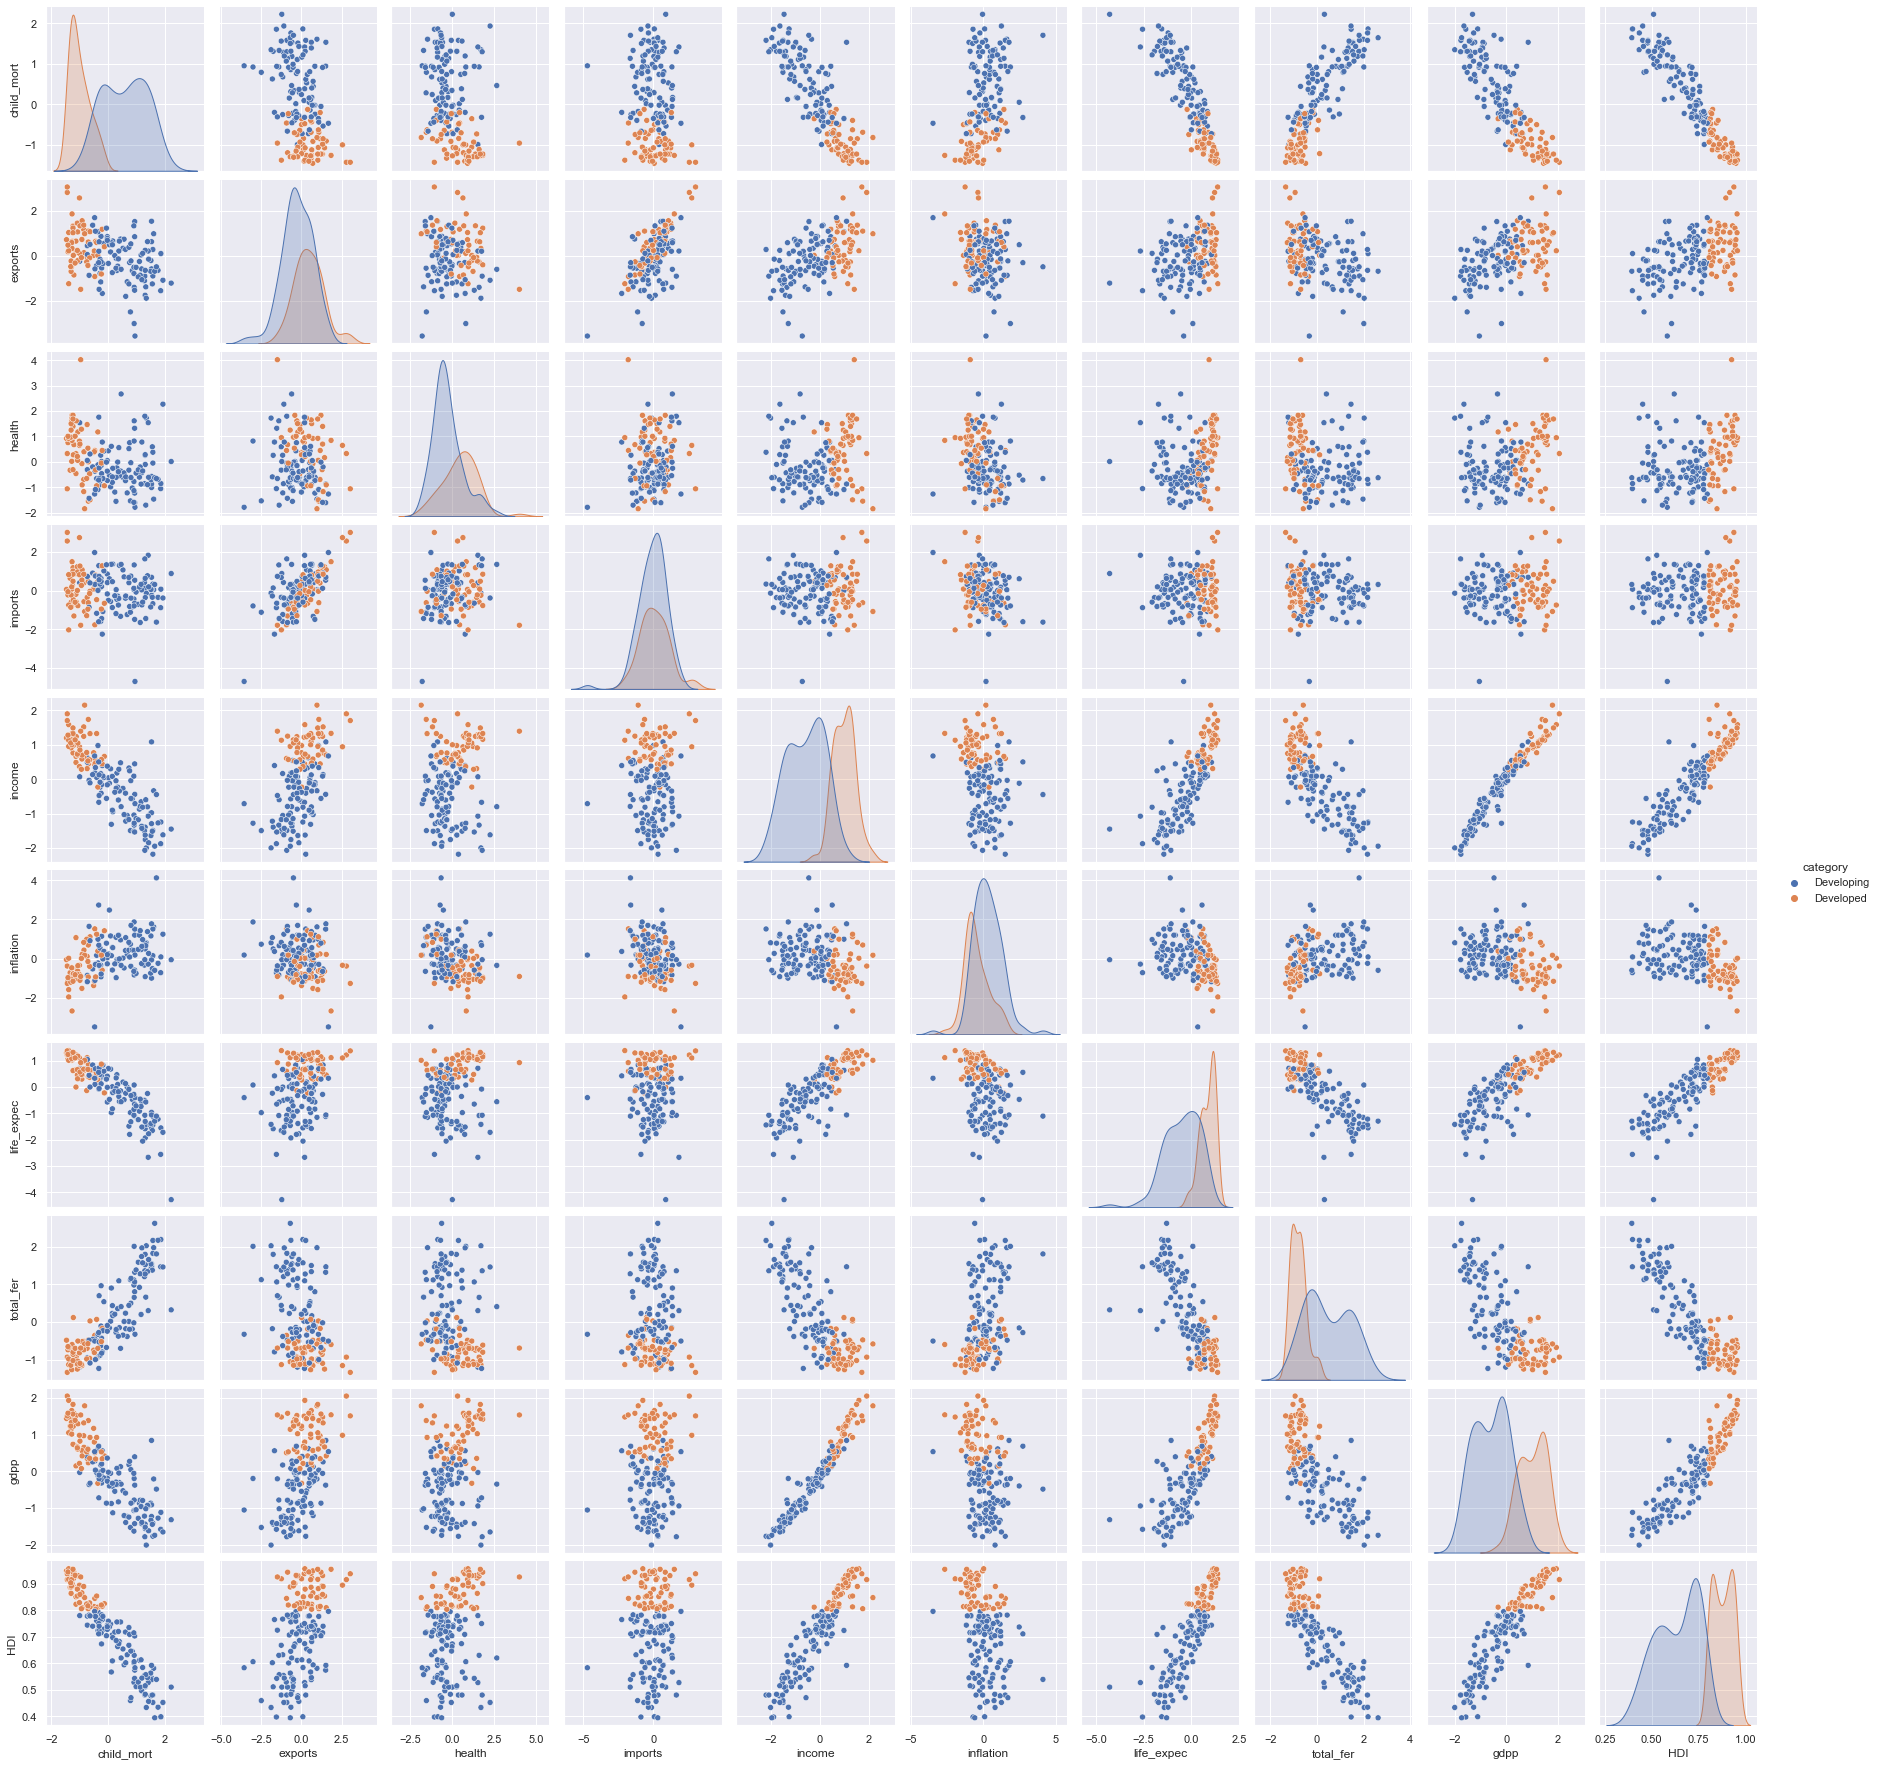

In [40]:
#Pairplot of scaled data
data3=data2.copy()
data3.columns=data2.columns
data3['country']=data['country']
data3['HDI']=data['HDI']
data3['category']=data['category']
sns.pairplot(data3,hue='category')


In [41]:
#Create K Means with 2 clusters

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
km = km.fit(data2)

data3['kmeans'] = km.predict(data2)
data3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,HDI,category,kmeans
0,1.307885,-1.761731,0.260943,0.135962,-1.393628,0.498659,-1.587689,1.800133,-1.436107,Afghanistan,0.511,Developing,0
1,-0.355319,-0.343160,-0.114054,0.295489,0.087055,-0.214531,0.654508,-0.918619,-0.110376,Albania,0.795,Developing,1
2,0.089748,0.159096,-0.980552,-0.564683,0.300268,1.160329,0.676818,0.020077,-0.052808,Algeria,0.748,Developing,1
3,1.608592,0.969602,-1.461131,0.044831,-0.337039,1.623092,-1.152636,1.977341,-0.208237,Angola,0.581,Developing,0
4,-0.730546,0.438271,-0.303373,0.688364,0.620103,-0.848405,0.710284,-0.538350,0.616465,Antigua and Barbuda,0.778,Developing,1


In [42]:
#K Means results

(data3[['category','kmeans']]
 .groupby(['kmeans','category'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))


number
kmeans category          
0      Developing      67
1      Developed       60
       Developing      35

In [43]:
#Create K Means with range of k
cluster= []
km_list = []

for c in range(1,21):
    km = KMeans(n_clusters=c, random_state=0)
    km = km.fit(data2)
    
    cluster.append(c)
    km_list.append(km.inertia_)
    


C:\Users\re487\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


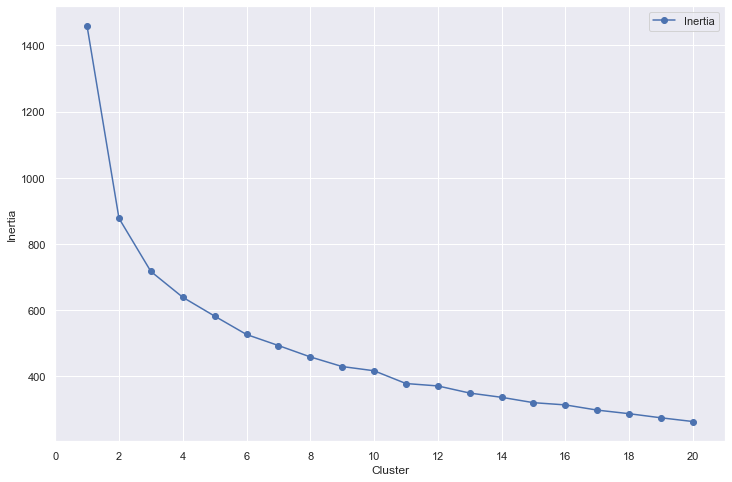

In [44]:
#Plot inertia of K Means models

plot_data=pd.DataFrame(cluster)
plot_data.columns=['K']
plot_data['Inertia']=km_list

ax = plot_data.plot(x='K',y='Inertia',marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [45]:
#Create Agglomerative Clustering with 2 clusters

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
agg = agg.fit(data2)
data3['agglomerative'] = agg.fit_predict(data2)


In [46]:
#Agglomerative Clustering results

(data3[['category','agglomerative','kmeans']]
 .groupby(['category','agglomerative'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
category   agglomerative        
Developed  0                  60
Developing 0                  61
           1                  41

In [47]:
#K Means results

(data3[['category','agglomerative','kmeans']]
 .groupby(['category','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
category   kmeans        
Developed  1           60
Developing 0           67
           1           35

In [48]:
#Agglomerative Clustering and K Means results

(data3[['category','agglomerative','kmeans']]
 .groupby(['category','agglomerative','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
category   agglomerative kmeans        
Developed  0             1           60
Developing 0             0           26
                         1           35
           1             0           41

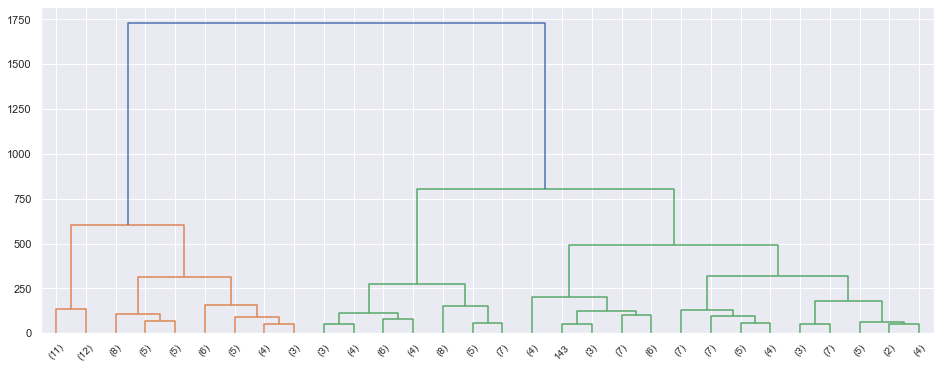

In [49]:
#Plot dendogram of Agglomerative Clustering

from scipy.cluster import hierarchy

hier = hierarchy.linkage(agg.children_, method='ward')

fig, ax = plt.subplots(figsize=(16,6))


denplot = hierarchy.dendrogram(hier, orientation='top', p=30, truncate_mode='lastp',show_leaf_counts=True, ax=ax)

In [50]:
#Get x and y variables

x=data2
y=data['category']
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(y))
y.columns=['category']

In [51]:
#Split data into stratified train and test sets

sss = StratifiedShuffleSplit(n_splits=10, random_state=0)

In [52]:
#Define function to get mean accuracy and f1score from stratified shuffle splits

def get_accuracy_score_splits(estimator, X, y):
    accuracylist = []
    scorelist = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        accuracylist.append(accuracy_score(y_test, y_pred))
        scorelist.append(f1_score(y_test, y_pred,average='binary'))
       
    
    return np.mean(accuracylist),np.mean(scorelist)


In [53]:
#Define function to create k means columns and call function to gets accuracy and f1 score results

from sklearn.linear_model import LogisticRegression

warnings.simplefilter("ignore")



def create_kmeans_columns(n):
    km = KMeans(n_clusters=n, random_state=0)
    km.fit(x)
    km_col = pd.Series(km.predict(x))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([x, km_col], axis=1)

estimator = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)
n_list = range(1, 21)

accuracy=[]
score=[]

for n in n_list:
    acc, sco = get_accuracy_score_splits(estimator, create_kmeans_columns(n), y)
    accuracy.append(acc)
    score.append(sco)



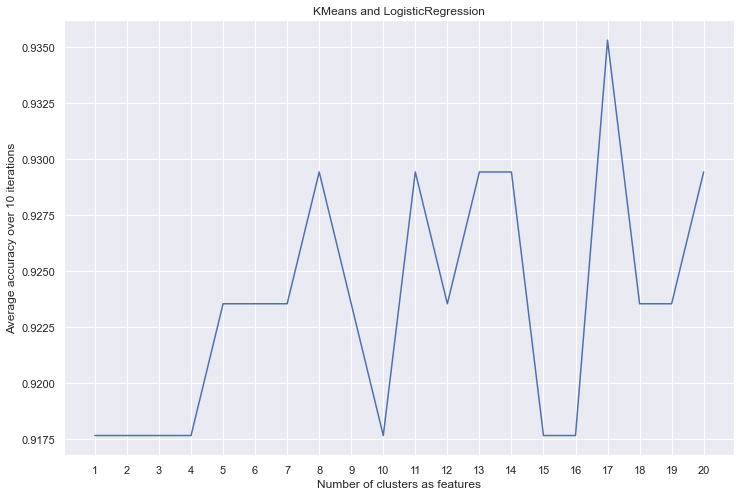

In [54]:
#Plot accuracy of k means clusters

ax = plt.axes()
ax.plot(n_list, accuracy)
ax.set(
    xticks= n_list,
    xlabel='Number of clusters as features',
    ylabel='Average accuracy over 10 iterations',
    title='KMeans and LogisticRegression'
)
ax.grid(True)


Logistic Regression with K Means shows high accuracy at k=8.

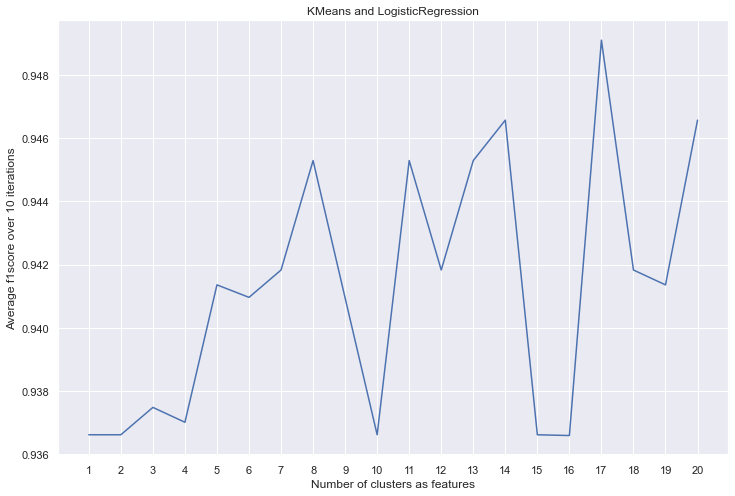

In [55]:
#Plot f1score of k means clusters

ax = plt.axes()
ax.plot(n_list, score)
ax.set(
    xticks= n_list,
    xlabel='Number of clusters as features',
    ylabel='Average f1score over 10 iterations',
    title='KMeans and LogisticRegression'
)
ax.grid(True)


In [56]:
#Train Lostic Regression model with best k means value

acc, sco = get_accuracy_score_splits(estimator, create_kmeans_columns(8), y)
   
metrics=np.arange(4)
metrics = metrics.astype(np.float64)



metrics[0]=acc
metrics[1]=sco


In [57]:
#Train logistic regression model without k means

acc2, sco2 = get_accuracy_score_splits(estimator, x, y)

metrics[2]=acc2
metrics[3]=sco2

warnings.simplefilter("default")

In [58]:
#Display metrics from the different models

metrics=metrics.reshape(2,2)
metric=pd.DataFrame(metrics)
metric.columns=['Accuracy','F1_score']
metric.index=['With K Means','Without K Means']

metric.T

,With K Means,Without K Means
Accuracy,0.929412,0.917647
F1_score,0.945290,0.936613


Logistic Regression with K Means has higher accuracy and f1score than without K Means.